# Konfigurasi kaggle

In [ ]:
pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"srihandini19","key":"996acba4235a7197b807301aa9eeff37"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
! kaggle datasets download shayanriyaz/riceleafs

100% 14.9G/14.9G [11:49<00:00, 24.4MB/s]
100% 14.9G/14.9G [11:49<00:00, 22.5MB/s]


In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
from skimage.io import imread, imsave
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.mobilenet import MobileNet 
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
#from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

# Extact Dataset

In [ ]:
try:
  os.mkdir('data')
except:
  print("Error, there is already a 'data' folder")

In [ ]:
import zipfile
with zipfile.ZipFile("/content/riceleafs.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

In [ ]:
train = '/content/RiceLeafs/train'
test = '/content/RiceLeafs/validation'

In [ ]:
labels = os.listdir(train)
labels.sort()
labels

['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
label= label_encoder.fit_transform(labels)
label

array([0, 1, 2, 3])

In [ ]:
label_encoder.classes_

array(['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast'], dtype='<U9')

# Data Visualisasi

In [ ]:
brownspot = ['/content/RiceLeafs/train/BrownSpot/' + img for img in os.listdir('/content/RiceLeafs/train' + '/BrownSpot')[:9]]
healthy = ['/content/RiceLeafs/train/Healthy/' + img for img in os.listdir('/content/RiceLeafs/train' + '/Healthy')[:9]]
hispa = ['/content/RiceLeafs/train/Hispa/' + img for img in os.listdir('/content/RiceLeafs/train' + '/Hispa')[:9]]
leafblast = ['/content/RiceLeafs/train/LeafBlast/' + img for img in os.listdir('/content/RiceLeafs/train' + '/LeafBlast')[:9]]

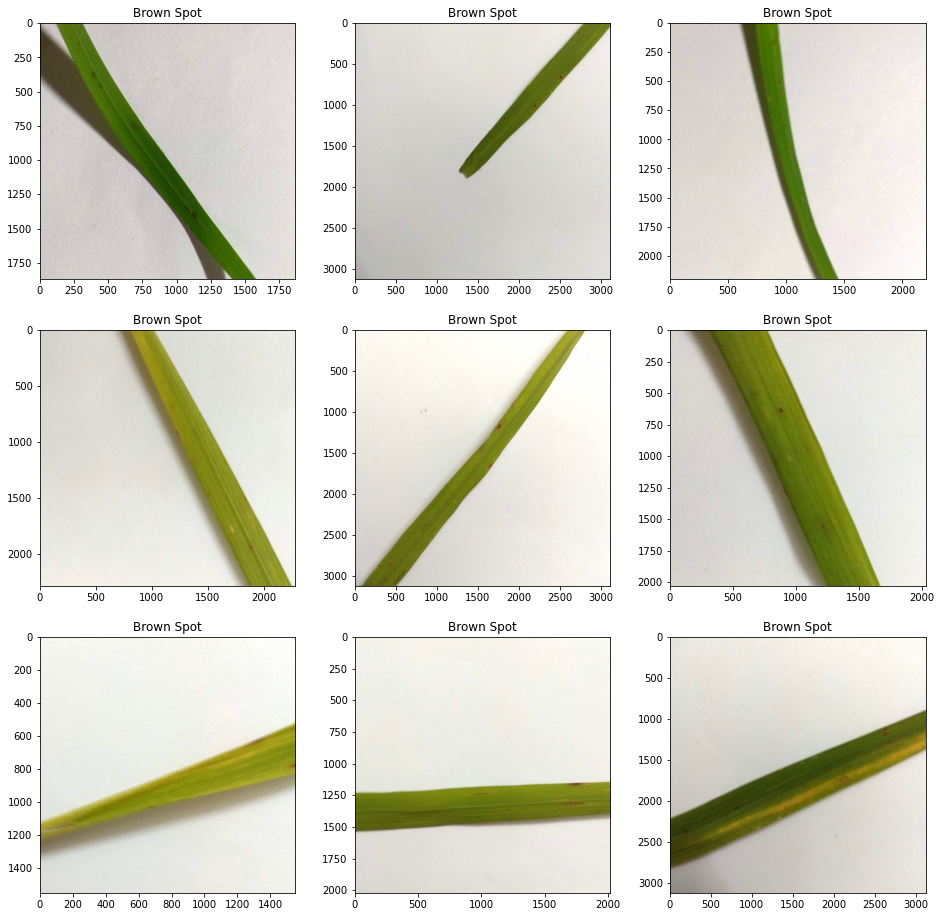

In [ ]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(brownspot):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Brown Spot")

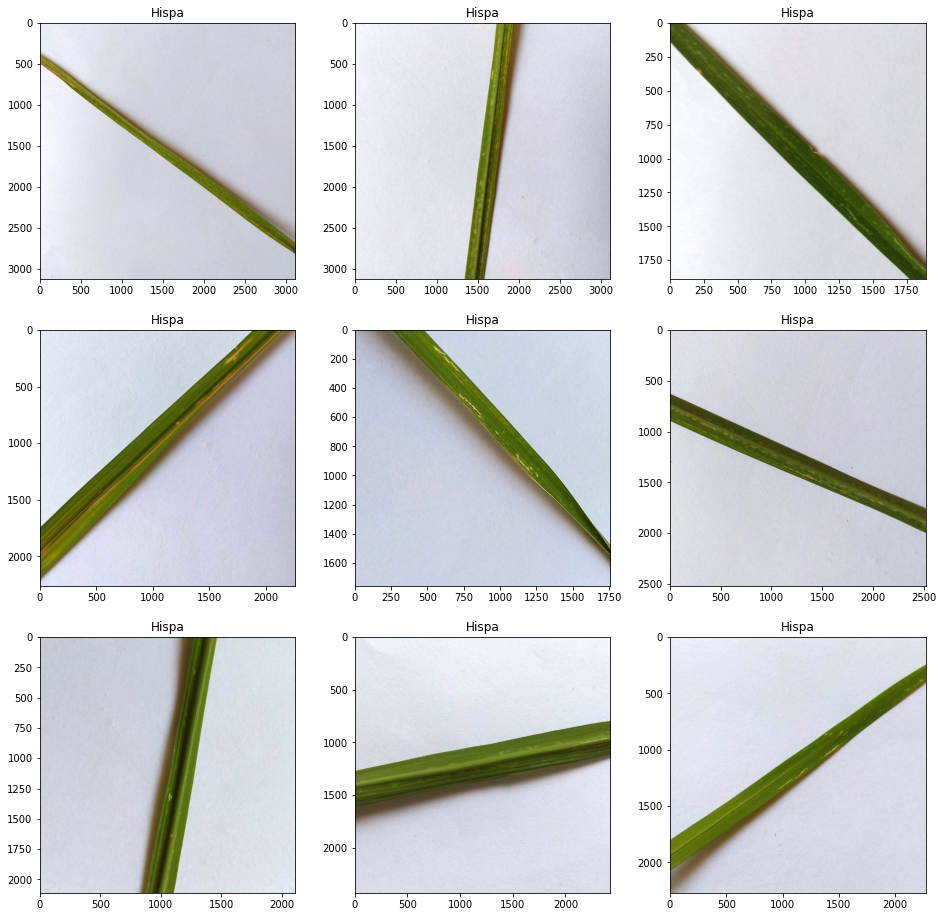

In [ ]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(hispa):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Hispa")

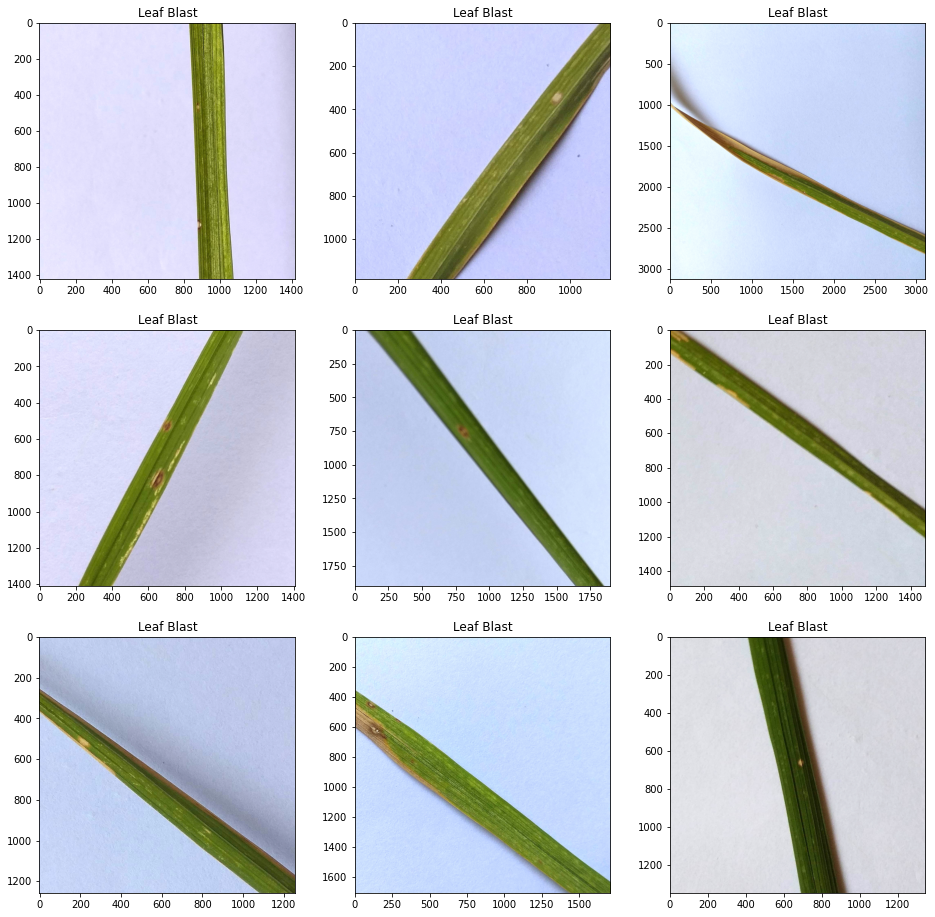

In [ ]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(leafblast):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Leaf Blast")

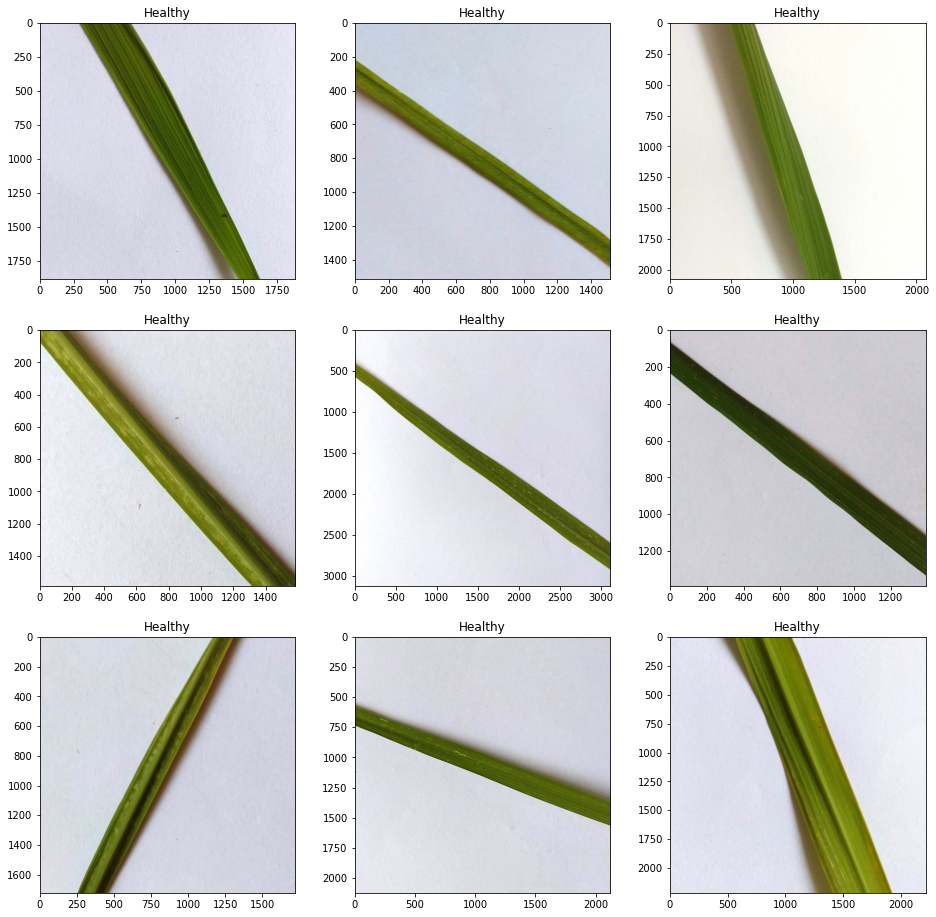

In [ ]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(healthy):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Healthy")

# Preprocessing

In [ ]:
dataset=[]
shape=(224,224)
count=0
#FOR EACH OF THE IMAGE
# 1. WE READ THE IMAGE IN RGB FORMAT
# 2. CONVERT IT INTO AN ARRAY 
# 3. SCALE DOWN THE PIXELS
# 4. STORE THE PIXEL INFORMATION
for file in os.listdir(train):
    path=os.path.join(train,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=shape)
        image=img_to_array(image)
        image=image/255.0
        dataset+=[[image,count]]
        t+=1
    count=count+1

In [ ]:
testset=[]
count=0
for file in os.listdir(test):
    path=os.path.join(test,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=shape)
        image=img_to_array(image)
        image=image/255.0
        testset+=[[image,count]]
        t+=1
    count=count+1

In [ ]:
data,labels0=zip(*dataset)
test,testlabels0=zip(*testset)

In [ ]:
labels1=to_categorical(labels0)
labels=np.array(labels1)

In [ ]:
data=np.array(data)
test=np.array(test)

In [ ]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=42)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(2147, 224, 224, 3)
(537, 224, 224, 3)
(2147, 4)
(537, 4)


In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=30,zoom_range=0.2,
                        width_shift_range=0.1,height_shift_range=0.2,shear_range=0.2)

# CNN

In [ ]:
model = Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224,224,3),
               data_format='channels_last'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=100)


Epoch 1/100
68/68 [==============================] - 23s 331ms/step - loss: 2.1401 - accuracy: 0.3982 - val_loss: 1.3287 - val_accuracy: 0.4469
Epoch 2/100
68/68 [==============================] - 23s 342ms/step - loss: 1.3469 - accuracy: 0.4425 - val_loss: 1.2743 - val_accuracy: 0.4469
Epoch 3/100
68/68 [==============================] - 23s 333ms/step - loss: 1.2836 - accuracy: 0.4429 - val_loss: 1.2435 - val_accuracy: 0.4469
Epoch 4/100
68/68 [==============================] - 24s 351ms/step - loss: 1.2639 - accuracy: 0.4429 - val_loss: 1.2380 - val_accuracy: 0.4469
Epoch 5/100
68/68 [==============================] - 22s 321ms/step - loss: 1.2551 - accuracy: 0.4429 - val_loss: 1.1980 - val_accuracy: 0.4469
Epoch 6/100
68/68 [==============================] - 23s 333ms/step - loss: 1.2578 - accuracy: 0.4425 - val_loss: 1.2221 - val_accuracy: 0.4469
Epoch 7/100
68/68 [==============================] - 22s 320ms/step - loss: 1.2323 - accuracy: 0.4453 - val_loss: 1.1964 - val_accuracy:

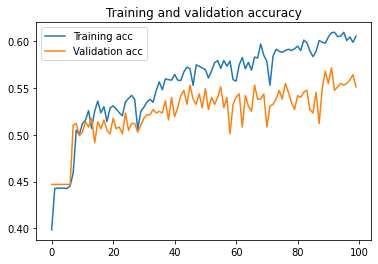

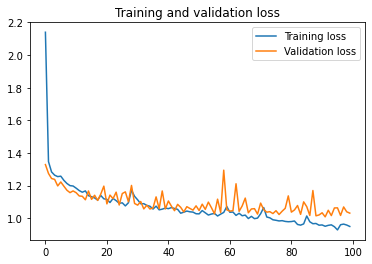

In [ ]:
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss =his.history['loss']
val_loss = his.history['val_loss']
plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/belajar/modelcnnrice.5h')

In [ ]:
y_pred=model.predict(testx)
pred= [np.argmax(y) for y in y_pred]
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

17/17 [==============================] - 0s 21ms/step
              precision    recall  f1-score   support

           0       0.51      0.91      0.65       240
           1       0.00      0.00      0.00        92
           2       0.66      0.17      0.27       133
           3       0.74      0.75      0.74        72

    accuracy                           0.55       537
   macro avg       0.48      0.46      0.42       537
weighted avg       0.49      0.55      0.46       537



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/belajar/modelcnnrice.h5")

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,rotation=90)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f'
    thresh = cm.max()/2.0
    
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        
        plt.text(j,i, format(cm[i,j], fmt),
                horizontalalignment = "center",
                color = "white" if cm[i,j] > thresh else "black")
        pass
    
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.grid(None);
    pass
     

17/17 [==============================] - 0s 21ms/step


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<Figure size 432x288 with 0 Axes>

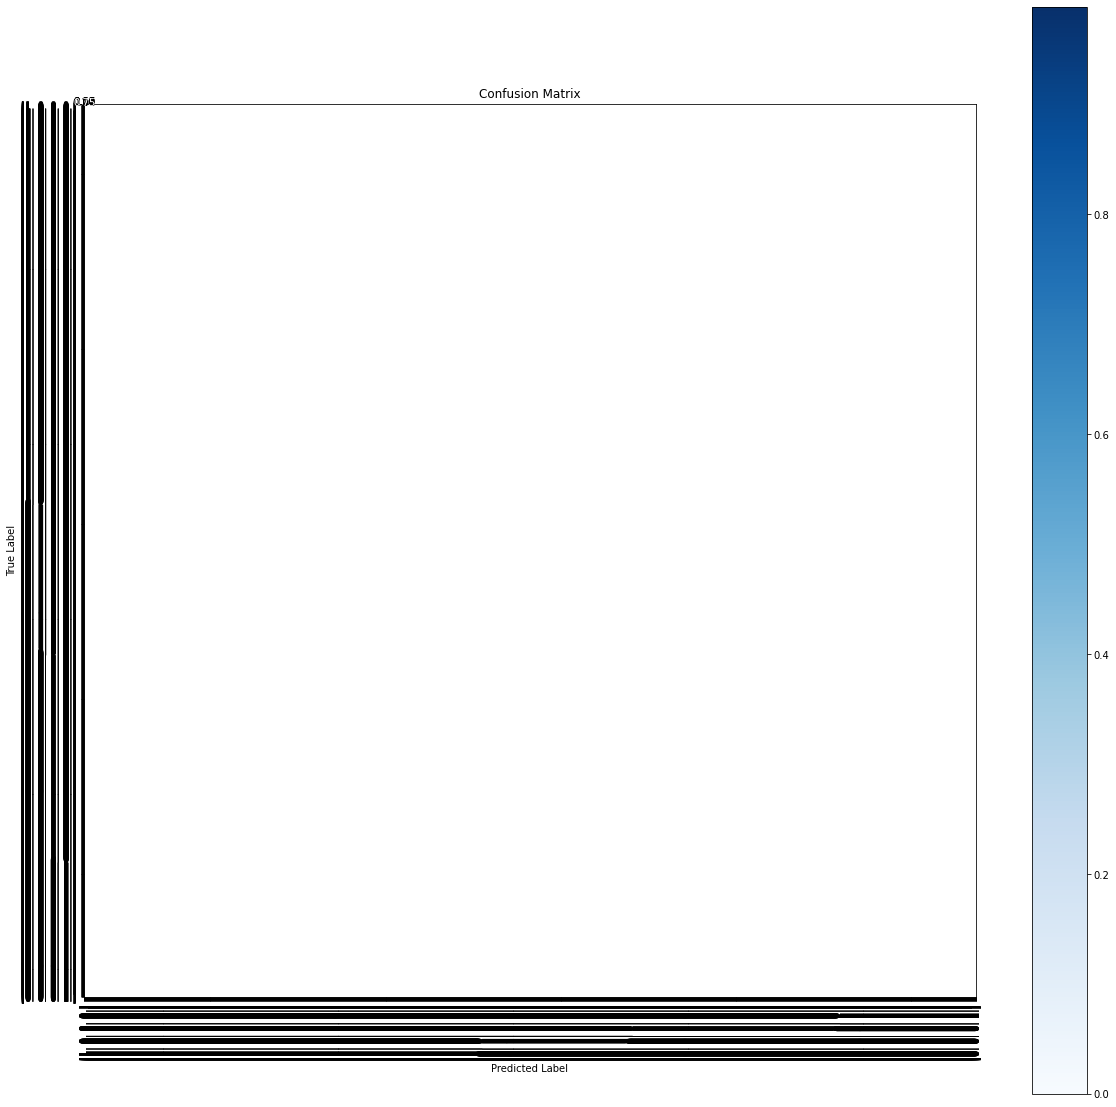

In [ ]:
y_pred=model.predict(testx)
pred= [np.argmax(y) for y in y_pred]
ground = np.argmax(testy,axis=1)
cnf_mat = confusion_matrix(ground, pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_mat, classes=labels)
plt.grid(None)
plt.show();

# VGG 16

In [ ]:
conv_base = tf.keras.applications.VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
conv_base.trainable = False
conv_base.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
for layer in conv_base.layers:
    layer.trainable = False

top_model = conv_base.output
top_model = tf.keras.layers.Flatten(name="flatten")(top_model)
top_model = tf.keras.layers.Dense(4096, activation='relu')(top_model)
top_model = tf.keras.layers.Dense(1072, activation='relu')(top_model)
top_model = tf.keras.layers.Dropout(0.5)(top_model)
output_layer = tf.keras.layers.Dense(4, activation='softmax')(top_model)
    
# Group the convolutional base and new fully-connected layers into a Model object.
model = Model(inputs=conv_base.input, outputs=output_layer)

# Compiles the model for training.
model.compile(optimizer=Adam(learning_rate=2e-5), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=100)

Epoch 1/100
68/68 [==============================] - 31s 451ms/step - loss: 1.3829 - accuracy: 0.3950 - val_loss: 1.2403 - val_accuracy: 0.4618
Epoch 2/100
68/68 [==============================] - 27s 398ms/step - loss: 1.2640 - accuracy: 0.4290 - val_loss: 1.2004 - val_accuracy: 0.4581
Epoch 3/100
68/68 [==============================] - 27s 399ms/step - loss: 1.2451 - accuracy: 0.4499 - val_loss: 1.1786 - val_accuracy: 0.4823
Epoch 4/100
68/68 [==============================] - 28s 415ms/step - loss: 1.2518 - accuracy: 0.4434 - val_loss: 1.2957 - val_accuracy: 0.3613
Epoch 5/100
68/68 [==============================] - 27s 402ms/step - loss: 1.2175 - accuracy: 0.4602 - val_loss: 1.1556 - val_accuracy: 0.5028
Epoch 6/100
68/68 [==============================] - 27s 400ms/step - loss: 1.1707 - accuracy: 0.4965 - val_loss: 1.1256 - val_accuracy: 0.4935
Epoch 7/100
68/68 [==============================] - 27s 398ms/step - loss: 1.1691 - accuracy: 0.4960 - val_loss: 1.1294 - val_accuracy:

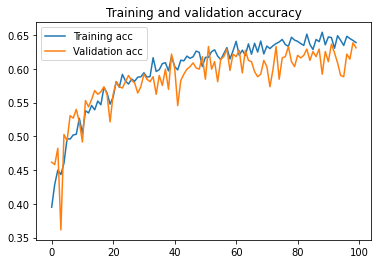

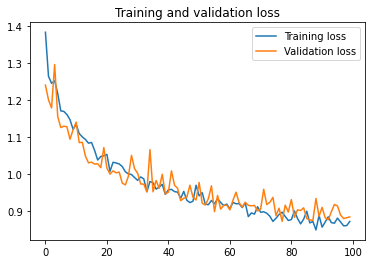

In [ ]:
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss =his.history['loss']
val_loss = his.history['val_loss']
plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/belajar/modelVGG16RICE.5h')

In [ ]:
y_pred=model.predict(testx)
pred= [np.argmax(y) for y in y_pred]
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

17/17 [==============================] - 3s 159ms/step
              precision    recall  f1-score   support

           0       0.61      0.84      0.70       240
           1       0.45      0.11      0.18        92
           2       0.74      0.53      0.62       133
           3       0.65      0.79      0.71        72

    accuracy                           0.63       537
   macro avg       0.61      0.57      0.55       537
weighted avg       0.62      0.63      0.59       537



In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/belajar/modelVGG16RICE.5h")

# Inception V3

In [ ]:
from keras.applications.inception_v3 import InceptionV3
inc = InceptionV3(input_shape=(224, 224, 3),
                                    include_top=False)

for layer in inc.layers:
    layer.trainable = False

top_model = inc.output
top_model = tf.keras.layers.Flatten(name="flatten")(top_model)
top_model = tf.keras.layers.Dense(4096, activation='relu')(top_model)
top_model = tf.keras.layers.Dense(1072, activation='relu')(top_model)
top_model = tf.keras.layers.Dropout(0.5)(top_model)
output_layer = tf.keras.layers.Dense(4, activation='softmax')(top_model)
    
# Group the convolutional base and new fully-connected layers into a Model object.
model = Model(inputs=inc.input, outputs=output_layer)

# Compiles the model for training.
model.compile(optimizer=Adam(learning_rate=2e-5), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                             

In [ ]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=100)

Epoch 1/100
68/68 [==============================] - 40s 401ms/step - loss: 1.5532 - accuracy: 0.4630 - val_loss: 1.1037 - val_accuracy: 0.5959
Epoch 2/100
68/68 [==============================] - 26s 382ms/step - loss: 1.1782 - accuracy: 0.5361 - val_loss: 1.0026 - val_accuracy: 0.5847
Epoch 3/100
68/68 [==============================] - 25s 361ms/step - loss: 1.1038 - accuracy: 0.5473 - val_loss: 0.9513 - val_accuracy: 0.6220
Epoch 4/100
68/68 [==============================] - 25s 361ms/step - loss: 1.0838 - accuracy: 0.5491 - val_loss: 1.0108 - val_accuracy: 0.5791
Epoch 5/100
68/68 [==============================] - 30s 446ms/step - loss: 1.0464 - accuracy: 0.5743 - val_loss: 0.9563 - val_accuracy: 0.5754
Epoch 6/100
68/68 [==============================] - 25s 361ms/step - loss: 1.0011 - accuracy: 0.5939 - val_loss: 0.9127 - val_accuracy: 0.6406
Epoch 7/100
68/68 [==============================] - 25s 373ms/step - loss: 0.9635 - accuracy: 0.6204 - val_loss: 0.9130 - val_accuracy:

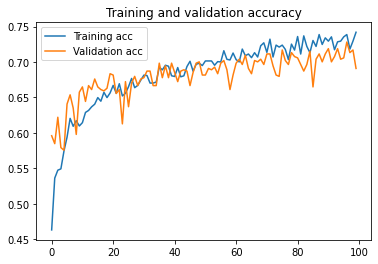

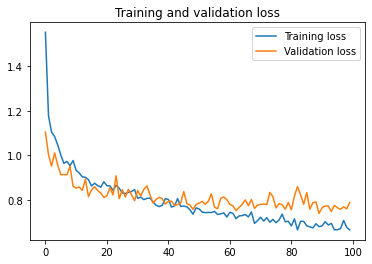

In [ ]:
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss =his.history['loss']
val_loss = his.history['val_loss']
plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/belajar/modelInceptionv3RICE Acc:{akurasi[1]}.5h')

In [ ]:
y_pred=model.predict(testx)
pred= [np.argmax(y) for y in y_pred]
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

17/17 [==============================] - 3s 77ms/step
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       240
           1       0.59      0.25      0.35        92
           2       0.61      0.71      0.66       133
           3       0.85      0.85      0.85        72

    accuracy                           0.69       537
   macro avg       0.69      0.65      0.65       537
weighted avg       0.68      0.69      0.67       537



In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/belajar/modelVGG16RICE.5h")

# MobileNet

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
mobile = MobileNet(weights="imagenet",include_top=False,input_shape=(224,224,3))

for layer in mobile.layers:
    layer.trainable = False

top_model = mobile.output
top_model = tf.keras.layers.Flatten(name="flatten")(top_model)
top_model = tf.keras.layers.Dense(4096, activation='relu')(top_model)
top_model = tf.keras.layers.Dense(1072, activation='relu')(top_model)
top_model = tf.keras.layers.Dropout(0.5)(top_model)
output_layer = tf.keras.layers.Dense(4, activation='softmax')(top_model)
    
# Group the convolutional base and new fully-connected layers into a Model object.
model = Model(inputs=mobile.input, outputs=output_layer)

# Compiles the model for training.
model.compile(optimizer=Adam(learning_rate=2e-5), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128    

In [ ]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=100)

Epoch 1/100
68/68 [==============================] - 33s 346ms/step - loss: 1.7364 - accuracy: 0.4443 - val_loss: 1.1460 - val_accuracy: 0.5177
Epoch 2/100
68/68 [==============================] - 23s 336ms/step - loss: 1.2314 - accuracy: 0.5137 - val_loss: 0.9973 - val_accuracy: 0.5903
Epoch 3/100
68/68 [==============================] - 23s 334ms/step - loss: 1.1144 - accuracy: 0.5515 - val_loss: 0.9510 - val_accuracy: 0.5996
Epoch 4/100
68/68 [==============================] - 25s 371ms/step - loss: 1.0459 - accuracy: 0.5696 - val_loss: 0.9609 - val_accuracy: 0.5903
Epoch 5/100
68/68 [==============================] - 23s 334ms/step - loss: 1.0347 - accuracy: 0.5776 - val_loss: 0.9806 - val_accuracy: 0.6015
Epoch 6/100
68/68 [==============================] - 23s 334ms/step - loss: 0.9683 - accuracy: 0.6036 - val_loss: 0.8663 - val_accuracy: 0.6462
Epoch 7/100
68/68 [==============================] - 23s 335ms/step - loss: 0.9518 - accuracy: 0.6022 - val_loss: 0.8850 - val_accuracy:

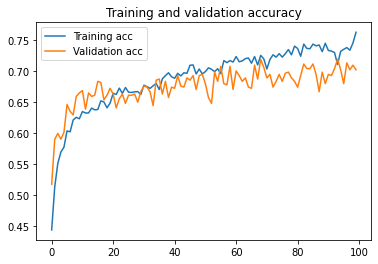

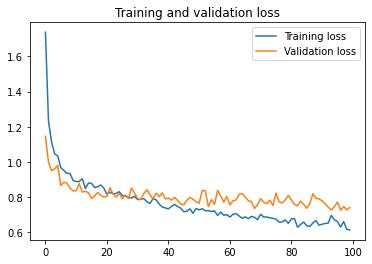

In [ ]:
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss =his.history['loss']
val_loss = his.history['val_loss']
plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/belajar/modelMobileNetRICE Acc:{akurasi[1]}.h5')

In [ ]:
y_pred=model.predict(testx)
pred= [np.argmax(y) for y in y_pred]
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

17/17 [==============================] - 2s 44ms/step
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       240
           1       0.51      0.22      0.31        92
           2       0.75      0.62      0.68       133
           3       0.82      0.88      0.85        72

    accuracy                           0.70       537
   macro avg       0.69      0.65      0.65       537
weighted avg       0.69      0.70      0.68       537



# Predict akhir

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/belajar/model rice/modelMobileNetRICE Acc:{akurasi[1]}.h5")

Saving cd689424-b0ea-4a3a-83be-db0a8c11f375.jfif to cd689424-b0ea-4a3a-83be-db0a8c11f375 (4).jfif
1/1 [==============================] - 0s 19ms/step


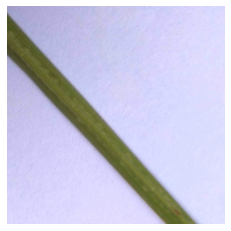

Hispa


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  img = cv2.imread(fn)
  img = cv2.resize(img,(224,224))
  img = np.reshape(img,[1,224,224,3])
  img_arr = np.zeros((1,224,224,3))
  img_arr[0, :, :, :] = img / 255.
  y_pred = model.predict(img_arr)
  plt.imshow(imread(fn))
  plt.axis('off')
  plt.show()
  index = np.argmax(y_pred)
  print(label_encoder.classes_[index])